<a href="https://colab.research.google.com/github/Abhishek-pandit2026/Encryptix_Tasks/blob/main/Task_2_Movie_Rating_Prediction_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 2 FROM Encryptix**

MOVIE RATING PREDICTION WITH PYTHON

*  Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
*  The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
*Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.




# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# **Load the dataset**

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.isnull().sum().sum()

33523

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
missing_values = df.isnull().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'missing values': missing_values.values,
    'Percentage': percentages.apply(lambda x: f'{x:.2f}%')
    }, index=df.columns)
result_df

,missing values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100

result_df = pd.DataFrame({
    'missing values': missing_values.values,
    'Percentage': percentages.apply(lambda x: f'{x:.2f}%')
    }, index=df.columns)
result_df

,missing values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%
Actor 2,0,0.00%
Actor 3,0,0.00%


In [ ]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [ ]:
missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100

result_df = pd.DataFrame({
    'missing values': missing_values.values,
    'Percentage': percentages.apply(lambda x: f'{x:.2f}%')
    }, index=df.columns)
result_df

,missing values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%
Actor 2,0,0.00%
Actor 3,0,0.00%


In [ ]:
# Assuming your data is in a DataFrame named 'df'
unique_genres = df['Genre'].unique()
print("Unique Genres:", unique_genres)

Unique Genres: ['Drama' 'Comedy, Romance' 'Drama, Romance, War' 'Action, Crime, Thriller'
 'Horror' 'Comedy, Drama' 'Comedy, Drama, Romance' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Comedy, Horror' 'Drama, Horror, Mystery'
 'Action, Thriller' 'Action' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Thriller' 'Comedy' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'Drama, History' 'Crime, Drama'
 'Adventure, Drama' 'Comedy, Mystery, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Family, Musical' 'Action, Comedy'
 'Action, Adventure, Fantasy' 'Documentary' 'Drama, Horror, Musical'
 'Action, Fantasy, Mystery' 'Adventure, Drama, Mystery'
 'Mystery, Thriller' 'Comedy, Crime, Drama' 'Musical, Romance'
 'Drama, Thriller' 'Action, Adventure, Comedy' 'Drama, Romance' 'Romance'
 'Action, Crime, Drama' 'Musical, Romance, Drama' 'Mystery, Romance'
 'Fantasy' 'Drama, Roman

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Ensure 'Year' column is of string type before performing string operations
df['Year'] = df['Year'].astype(str)

# Extract the first occurrence of a pattern (one to three digits) from the 'Year' column
df['Year'] = df['Year'].str.extract(r'([0-9]{0,3})', expand=False)

# Verify the changes
print(df.dtypes)
print(df.head())


Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
                                 Name Year Duration  \
1  #Gadhvi (He thought he was Gandhi)       109 min   
3                             #Yaaram       110 min   
5                ...Aur Pyaar Ho Gaya       147 min   
6                           ...Yahaan       142 min   
8                  ?: A Question Mark        82 min   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson P

In [ ]:
df['Duration'] =df['Duration'].str.extract(r'([0-9]+)', expand=False)

In [ ]:
df['Duration']=pd.to_numeric(df['Duration'])
df['Year']=pd.to_numeric(df['Year'])

In [ ]:
df['Votes'] = df['Votes'].str.extract(r'([0-9]+)', expand=False)
df['Votes']=pd.to_numeric(df['Votes'])

In [ ]:
df['Duration'].dtype,df['Year'].dtype,df['Votes'].dtype

(dtype('int64'), dtype('float64'), dtype('int64'))

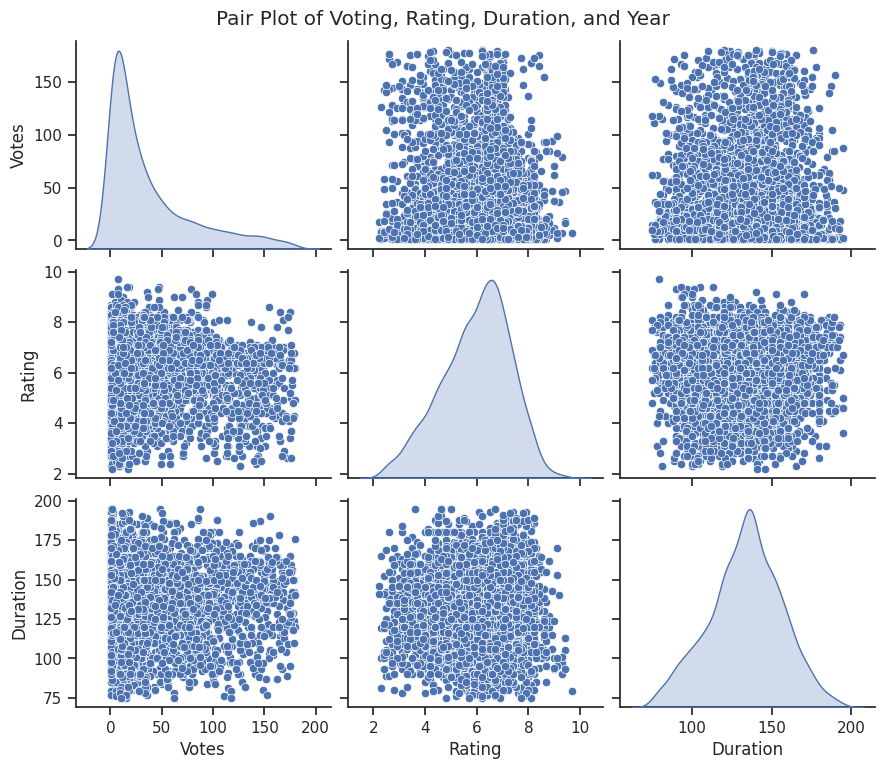

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style = 'ticks')
# Assuming 'df' is the correct DataFrame you want to use
sns.pairplot(df[columns_of_interest], diag_kind = 'kde', markers = 'o', palette = 'viridis', height = 2.5, aspect = 1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration, and Year' , y = 1.02)
plt.show()

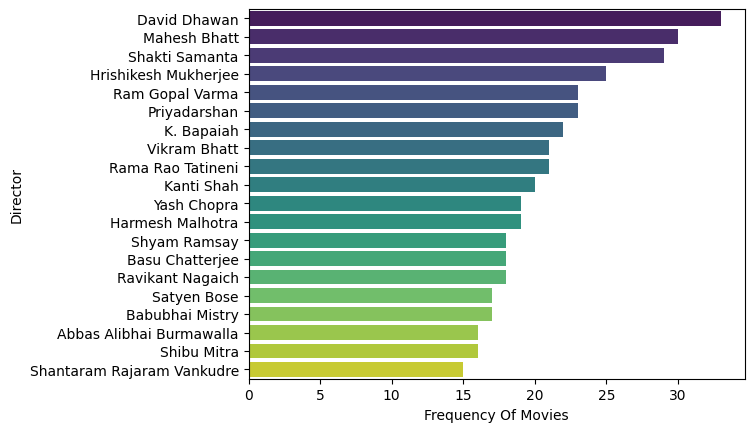

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_20_directors = df.groupby('Director')['Name'].count().sort_values(ascending=False).head(20)

sns.barplot(y=top_20_directors.index, x=top_20_directors.values, orient='h', palette='viridis')
plt.xlabel('Frequency Of Movies')
plt.ylabel('Director')
plt.show()

correlartion Of Duration And Rating is 0.028405918077782297


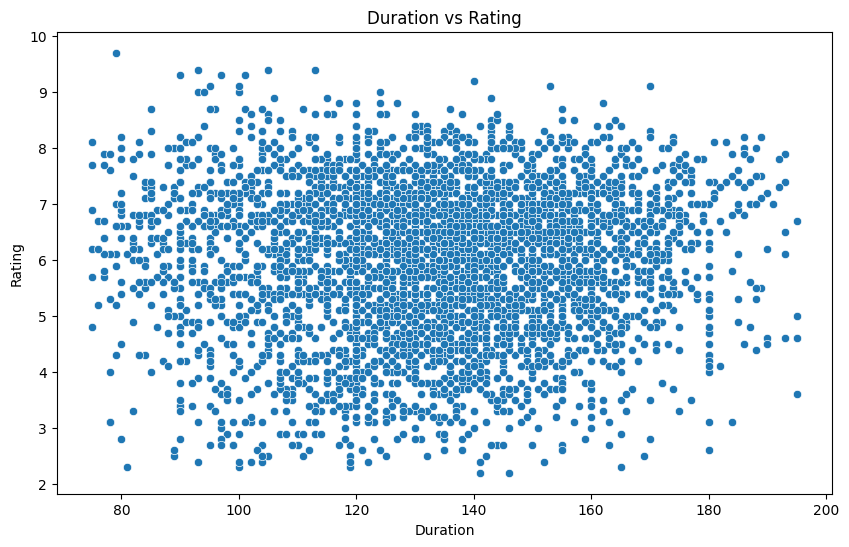

In [ ]:
corr_leng_rat=df['Duration'].corr(df['Rating'])
print(f"correlartion Of Duration And Rating is {corr_leng_rat}")

plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration vs Rating')
plt.show()

In [ ]:
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies overall")
overall

Top 10 Movies overall


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,NaN,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,NaN,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Gho Gho Rani,NaN,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3,June,NaN,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,The Reluctant Crime,NaN,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5,Ashok Vatika,NaN,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
6,Baikunth,NaN,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
7,God of gods,NaN,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8,Love Sorries,NaN,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
9,Refl3ct,NaN,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


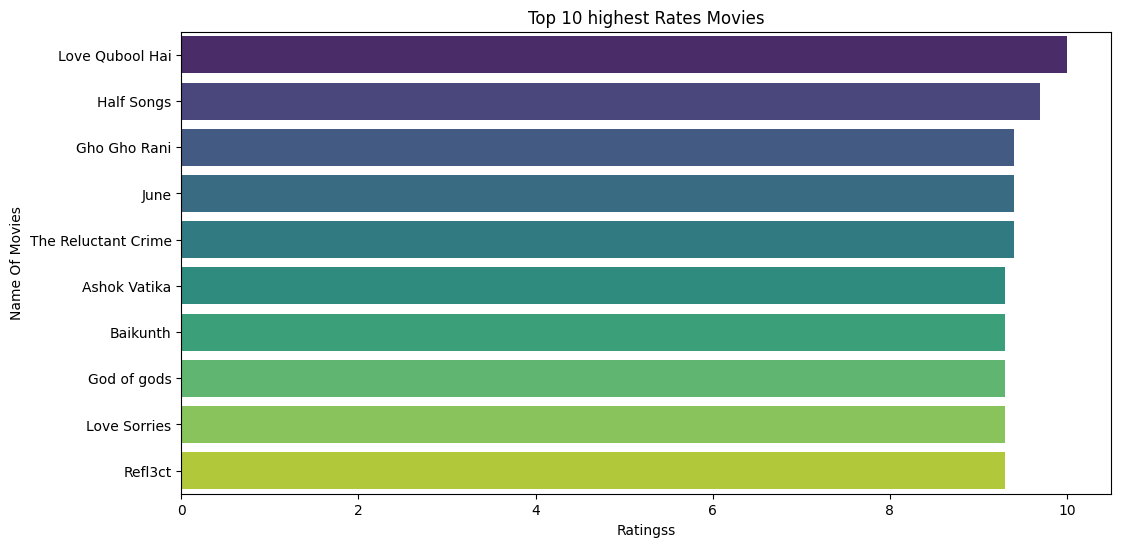

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Name',x='Rating',orient='horizontal',data=overall,palette='viridis')
plt.title("Top 10 highest Rates Movies")
plt.ylabel('Name Of Movies')
plt.xlabel('Ratingss')
plt.show()

In [ ]:
for year in df['Year'].unique():
  year_df =df[df['Year'] == year]
  top_10_year = year_df.nlargest(10,'Rating').sort_values(by='Rating', ascending=False)
  print(f"\nTop-10 Movies of the year {year}:")
  print(top_10_year)
  print("\n")


Top-10 Movies of the year nan:
Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []




In [ ]:
actors = pd.concat([dataset['Actor 1'], dataset['Actor 2'], dataset['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number of Movies']
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Number of Movies', y = 'Actor', data = actor_counts.head(10), palette = 'viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

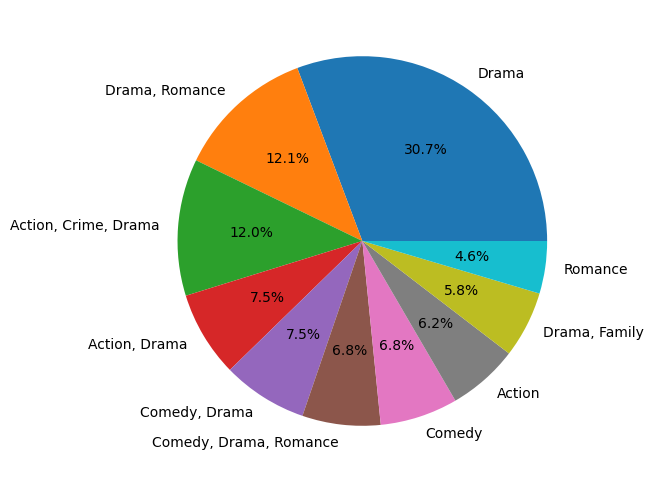

In [ ]:
plt.figure(figsize=(12,6))
df['Genre'].value_counts().sort_values(ascending=False)[:10].plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("")
plt.show

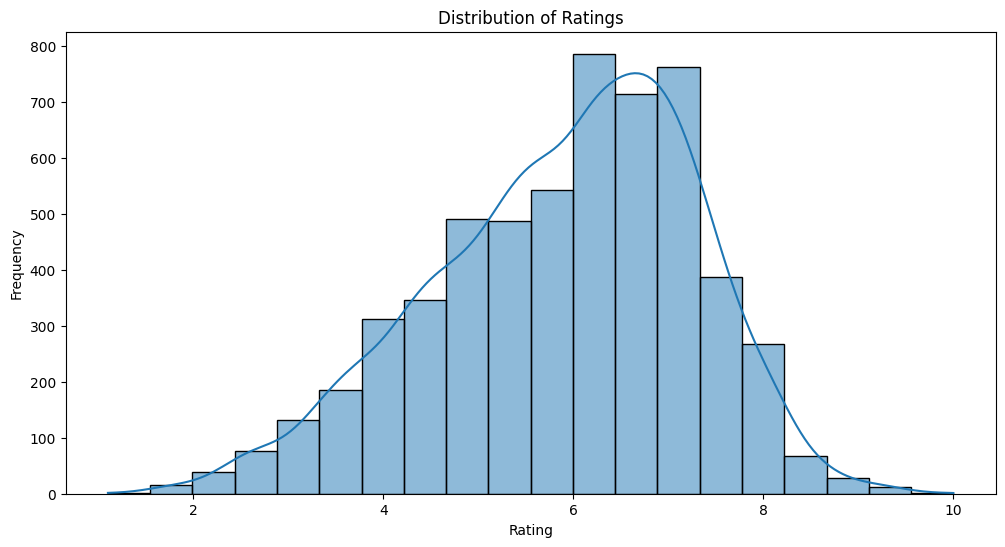

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Rating'],bins=20,kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
actor = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts().reset_index()
actors = actor.rename(columns={'index': 'Name', 'count': 'no_of_movies'})

In [ ]:
print(actors.columns)

Index(['Name', 'no_of_movies'], dtype='object')


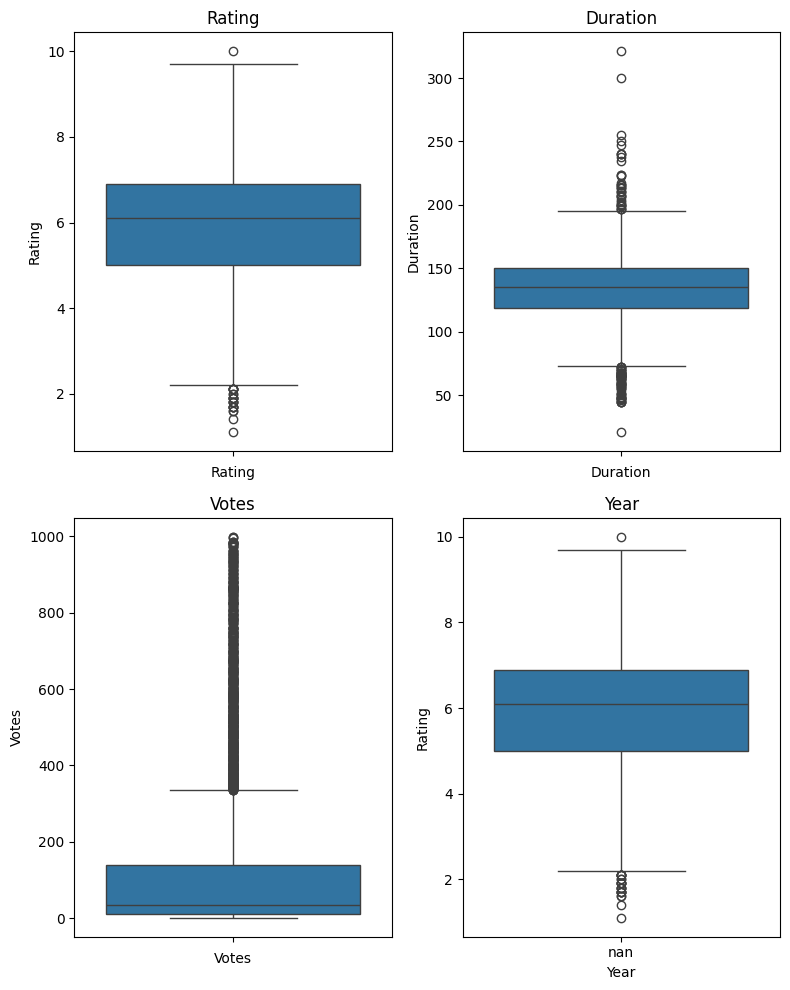

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe
# df = pd.read_csv('path_to_your_file.csv')

# Ensure 'Year' is treated as a categorical variable
df['Year'] = df['Year'].astype(str)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))

sns.boxplot(data=df, y='Rating', ax=ax[0][0])
ax[0][0].set_title('Rating')
ax[0][0].set_xlabel('Rating')

sns.boxplot(data=df, y='Duration', ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df, y='Votes', ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

# Here we treat 'Year' as a categorical variable
sns.boxplot(data=df, x='Year', y='Rating', ax=ax[1][1])
ax[1][1].set_title('Year')
ax[1][1].set_xlabel('Year')

plt.tight_layout()
plt.show()


In [ ]:
def outler(col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

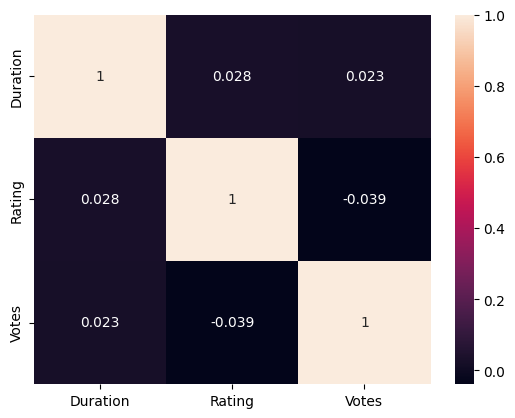

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score,mean_squared_error

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Mean_Rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [ ]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Genre_Mean_Rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

In [ ]:
x =df[['Year', 'Duration', 'Votes', 'Genre_Mean_Rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y =df['Rating']

In [ ]:
# Check if the DataFrame is empty
print(df.shape)

# If the DataFrame is empty, reload or recreate it
if df.empty:
    # Code to reload or recreate the DataFrame
    df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')  # Replace 'your_data.csv' with the actual file path

# Proceed with the train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

(4322, 14)


In [ ]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Mean_Rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,nan,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.398830,7.000000,7.000000,7.000000,7.000000
3,nan,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,6.055263,4.400000,5.766667,4.400000,4.400000
6,nan,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.650000,7.383333,5.833333,6.933333,6.733333
9,nan,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,5.811765,4.000000,4.000000,4.000000,4.000000
10,nan,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.398830,6.200000,5.480000,5.337500,5.725000


In [ ]:
df = df.dropna(subset = ['Votes']) # Capitalize 'votes' to 'Votes'
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Mean_Rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,nan,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.398830,7.000000,7.000000,7.000000,7.000000
3,nan,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,6.055263,4.400000,5.766667,4.400000,4.400000
6,nan,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.650000,7.383333,5.833333,6.933333,6.733333
9,nan,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,5.811765,4.000000,4.000000,4.000000,4.000000
10,nan,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.398830,6.200000,5.480000,5.337500,5.725000


In [ ]:
df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

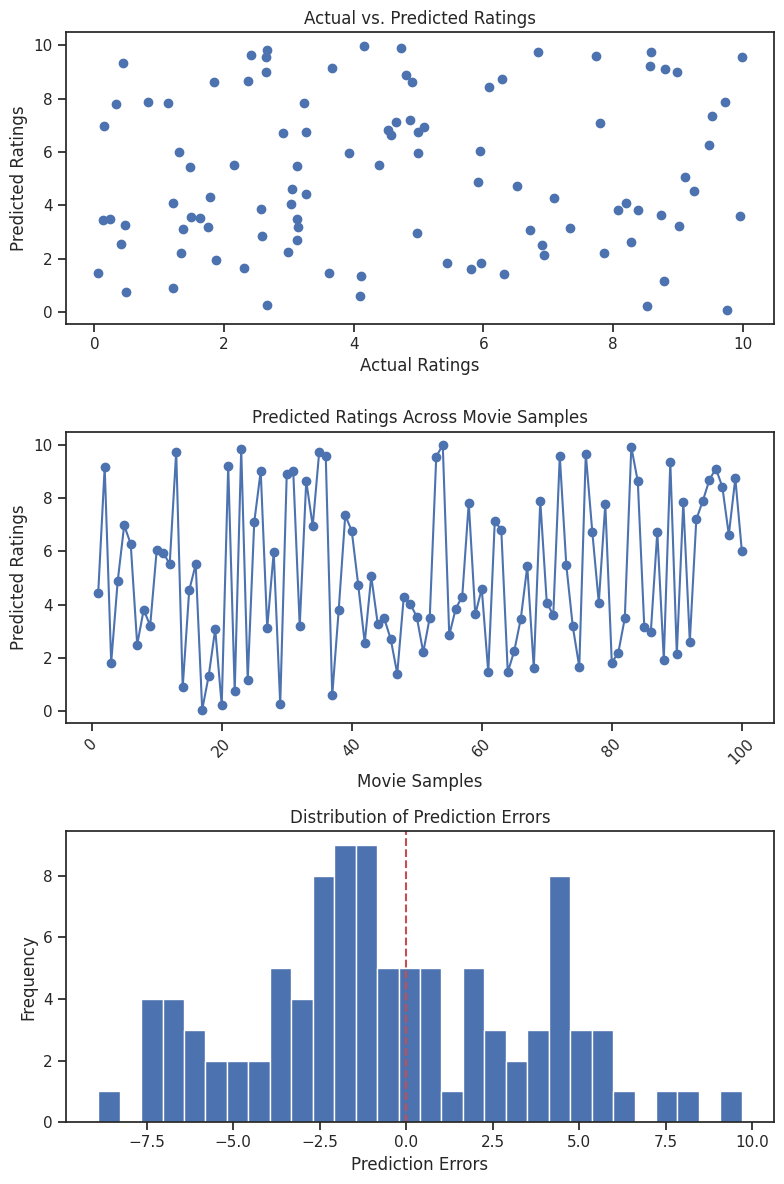

In [ ]:
y_test = np.random.rand(100) * 10 # Actual ratings
y_pred = np.random.rand(100) * 10 # Predicted Ratings
errors = y_test - y_pred
fig, axs =  plt.subplots(3, 1, figsize = (8, 12))

axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")

# Line plot

movie_samples = np.arange(1, len(y_pred) + 1)
axs[1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis = 'x', rotation = 45)

#Histogram

axs[2].hist (errors, bins = 30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x = 0, color = 'r', linestyle = '--')
plt.tight_layout()
plt.show()